# CNN for computer vision
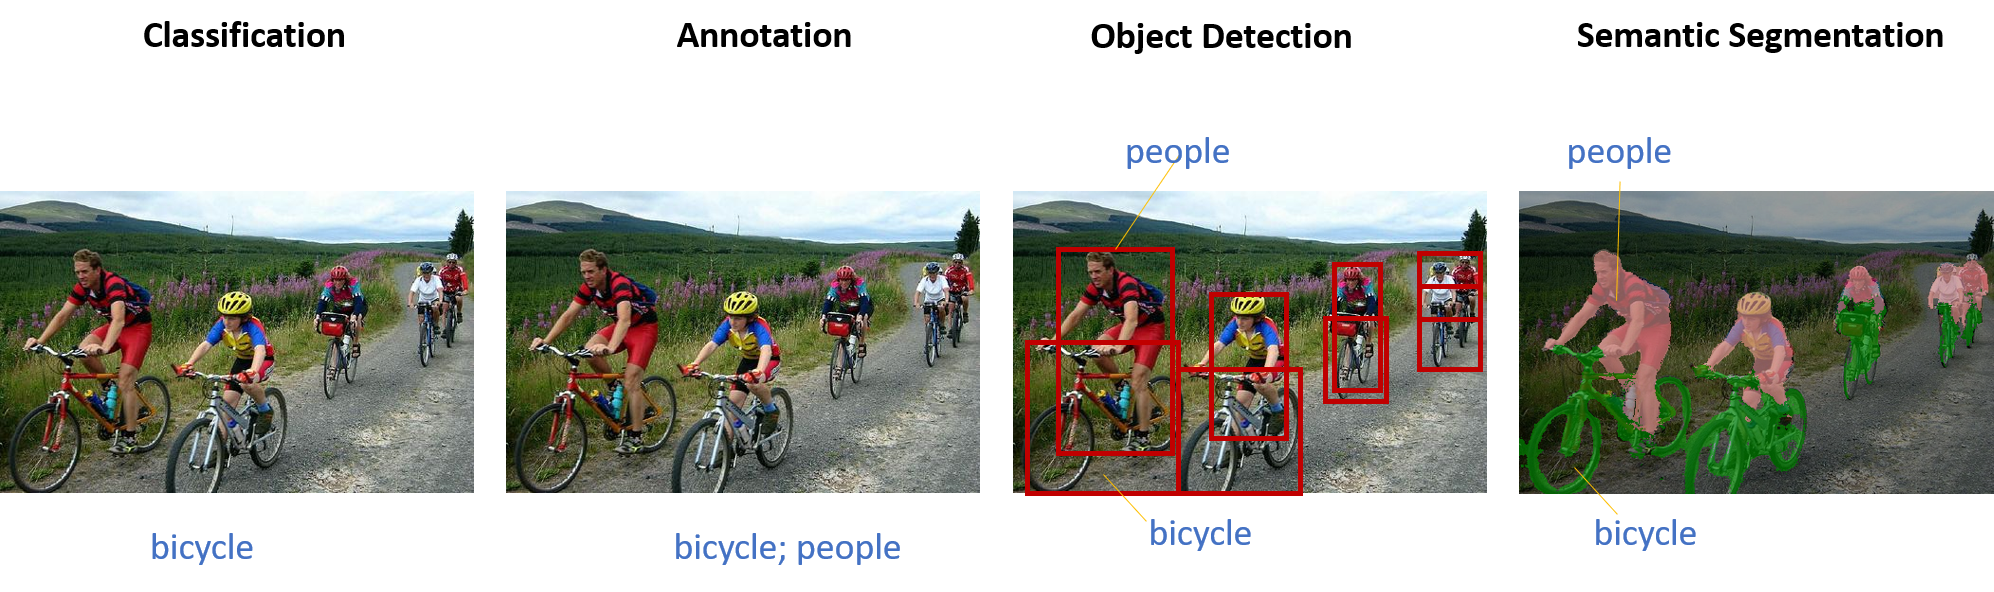

Example applications 

* [Logo classification](https://data.vision.ee.ethz.ch/cvl/lld/)
* [Traffic sign classification](https://towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab)
* [Ecommerce product classification](https://www.kaggle.com/c/cdiscount-image-classification-challenge/data)
* [Medical image classification](https://www.kaggle.com/c/data-science-bowl-2017)
* [Food image classification](http://foodlg.com/)
* [Planet: Understanding the Amazon from Space](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space)
* [Real-time object detection](https://www.youtube.com/watch?v=mfB1C4QQJr4)
* [ImageNet classification](http://image-net.org/)


CNN is widely used as a **supervised learning** approach for **pattern recognition**. The training dataset consists of **<x,y>** pairs, where y is the label of x, e.g. the food name of the given picture, or the tags of an image, or the bounding boxes of all objects in an image. After training, for each new data sample, the model generates predictions for it.

In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from utils import plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CNN for MNIST image classification

Make predictions using a simple CNN model 

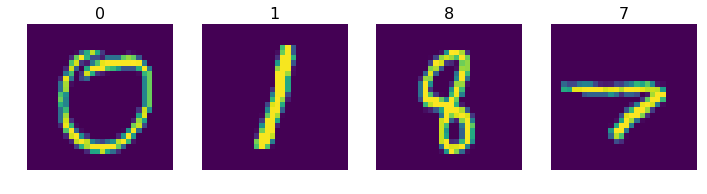

In [38]:
from keras.datasets import mnist
from mnist_cnn import MnistCNN
import random 

# load model
model = MnistCNN()
model.load_weights('ckpt/mnist_cnn')

# prepare test data
(_,_), (x, _) = mnist.load_data()
x = x[random.sample(range(x.shape[0]), 4)]

# make prediction
preds = model.predict(x, batchsize=x.shape[0])

# get top-1 prediction as the result
idxs = np.argmax(preds, axis=1)
plots(x, titles=idxs)

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 24, 24)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

Model construction

In [40]:
H = W = 28
def create_mnist_cnn(size, num_classes):
    mcnn = Sequential()
    mcnn.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(1, size, size)))
    mcnn.add(Conv2D(64, (3, 3), activation='relu'))
    mcnn.add(MaxPooling2D(pool_size=(2, 2)))
    mcnn.add(Dropout(0.25))
    mcnn.add(Flatten())
    mcnn.add(Dense(128, activation='relu'))
    mcnn.add(Dropout(0.5))
    mcnn.add(Dense(num_classes, activation='softmax'))
    return mcnn

model = create_mnist_cnn(H, 10)
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Covolution and pooling layers

1D Convolution (cross-correlation)

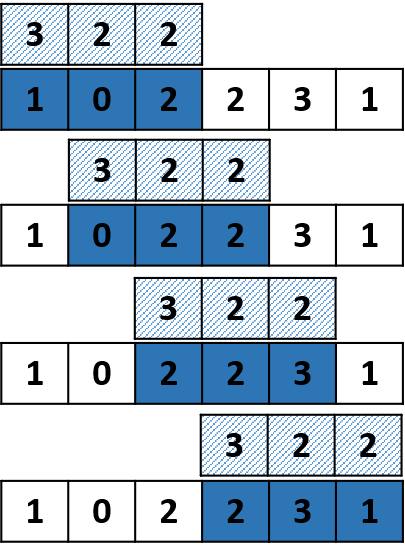


Convolution VS MLP

* Sparse connection
* Weight sharing
* Location invariant
    
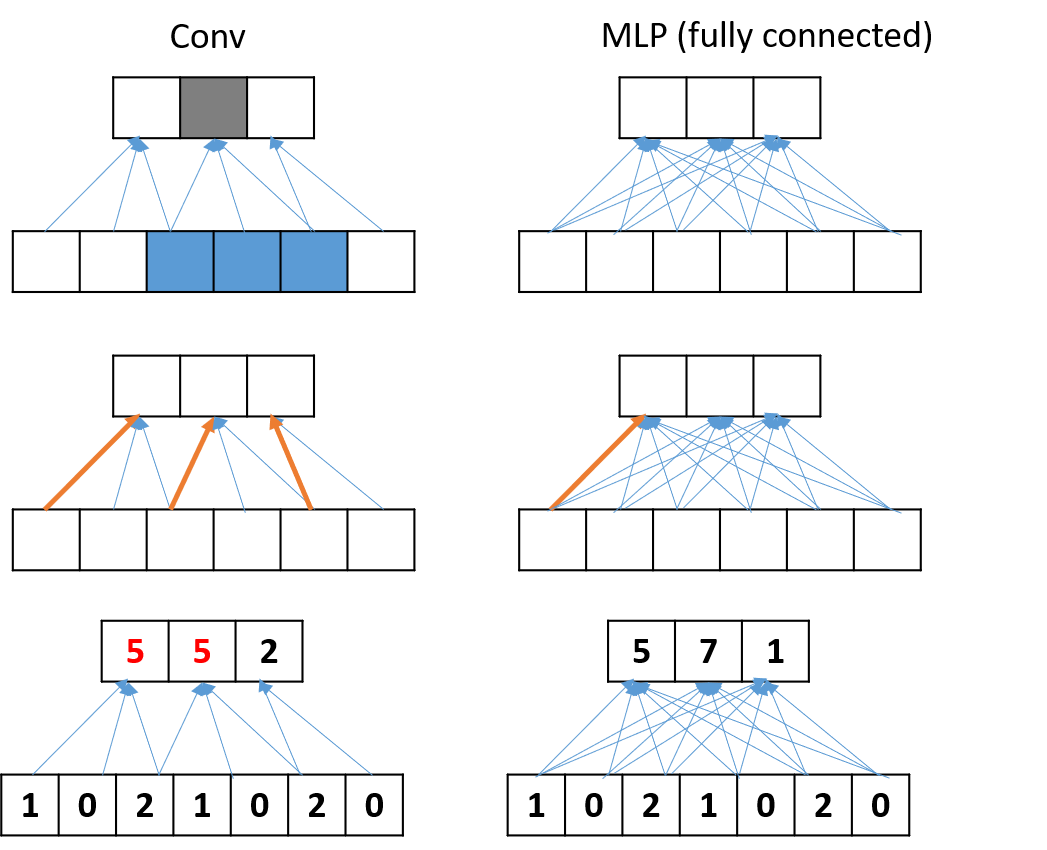


2D convolution 
<img src="http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif">

2D convolution with multiple channels (kernels)
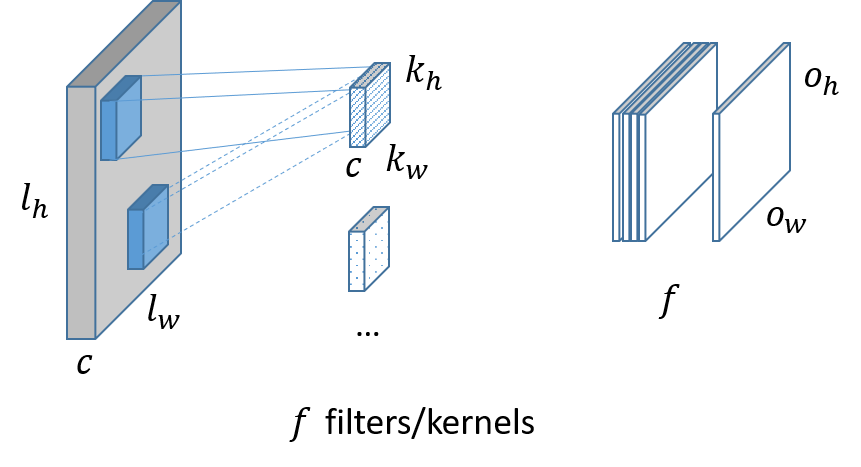


2D convolution example 1
* receptive field size = kernel size = (3, 3)
* input feature map size = (4, 4)
* output feature map size = (2, 2)
* padding size = 0
* stride size = 0
<img src="http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif">

2D Convolution example 2
* receptive field size = kernel size = (3, 3)
* input feature map size = (5, 5)
* output feature map size = (5, 5)
* padding size = 2
* stride size = 0
<img src="http://deeplearning.net/software/theano/_images/same_padding_no_strides.gif">


2D Convolution example 3
* receptive field size = kernel size = (3, 3)
* input feature map size = (5, 5)
* output feature map size = (2, 2)
* padding size = 0
* stride size = 2
<img src="http://deeplearning.net/software/theano/_images/no_padding_strides.gif">


Pooling
* max pooling
* average pooling

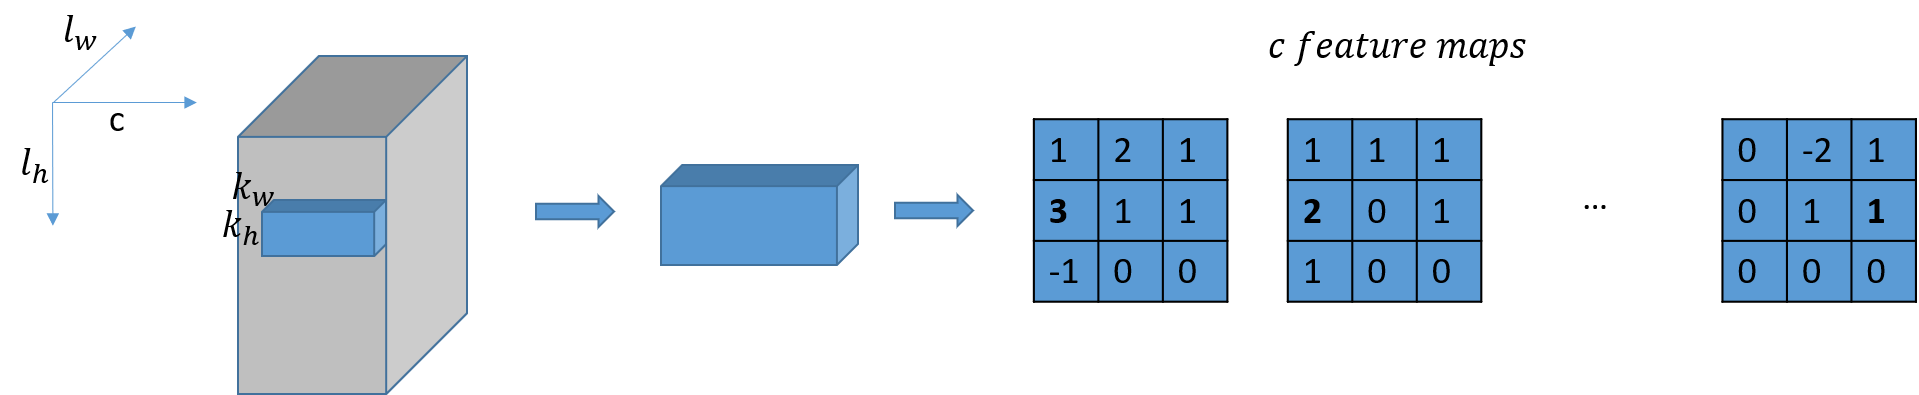

**Training and evaluation **

In [41]:
import keras

epochs=1
batch_size=128
num_classes=10
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1], x_test.shape[2])
# input_shape = (1,  x_train.shape[1], x_trian.shape[2])


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 9s 144us/step - loss: 0.3385 - acc: 0.8965 - val_loss: 0.0805 - val_acc: 0.9742
Test loss: 0.0805358003458
Test accuracy: 0.9742


**Prediction**

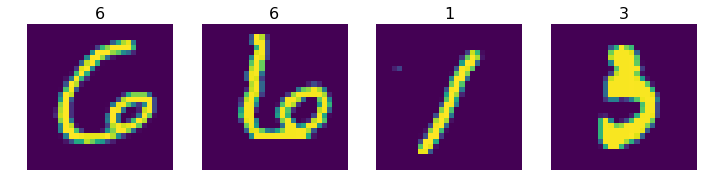

In [42]:
# prepare test data
(_,_), (x, _) = mnist.load_data()
samples = x[random.sample(range(x.shape[0]), 4)]
x = samples.astype('float32')
x = x.reshape(x.shape[0], 1, H, W)
x /= 255
preds = model.predict(x, x.shape[0])

# get top-1 prediction as the result
idxs = np.argmax(preds, axis=1)
plots(samples, titles=idxs)

### CNN architectures
CNN timeline
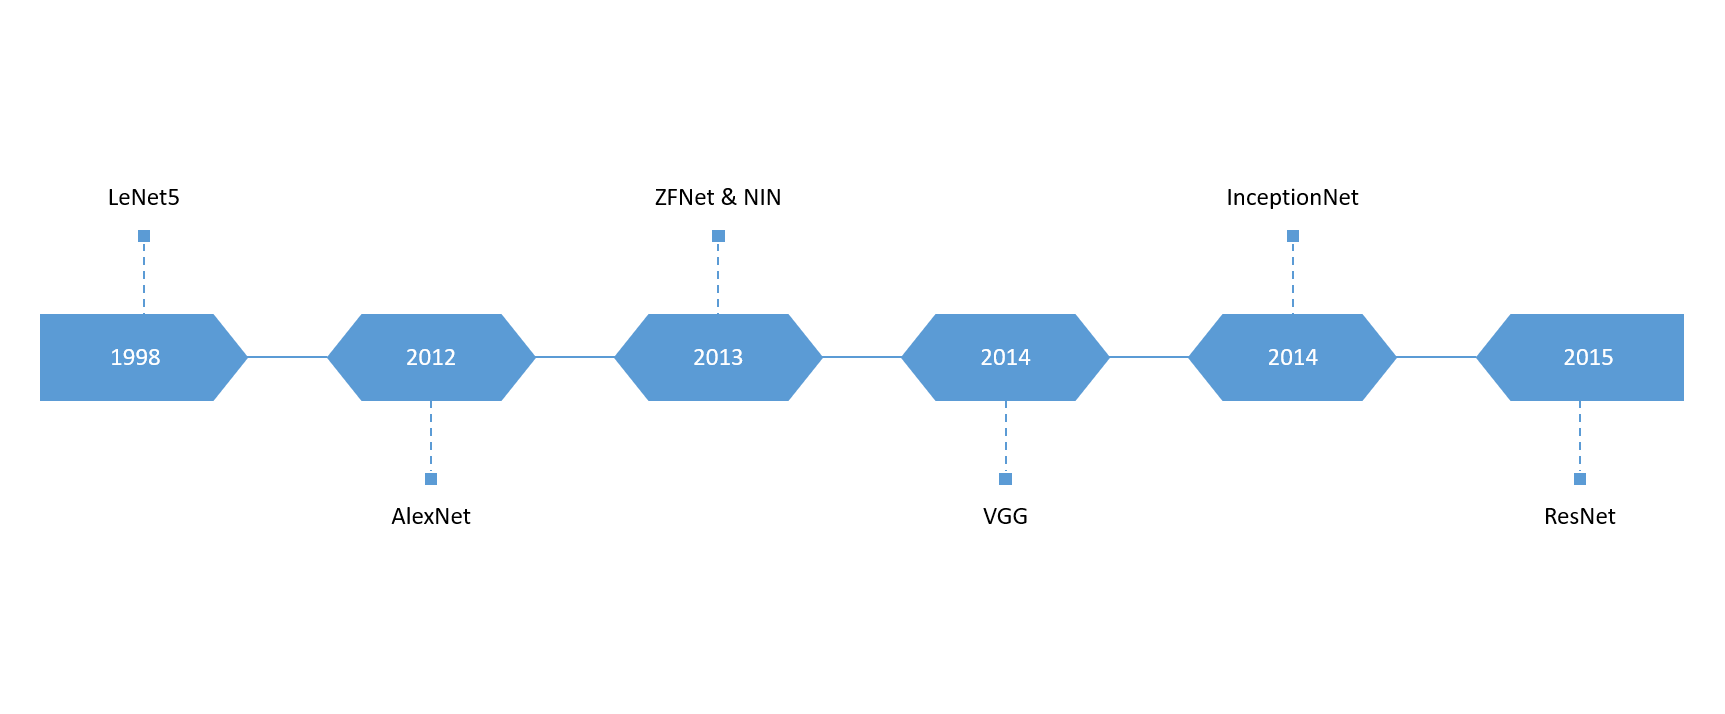


Popular CNN architectures
* AlexNet
* VGG
* InceptionNet (GoogleNet)
* ResNet

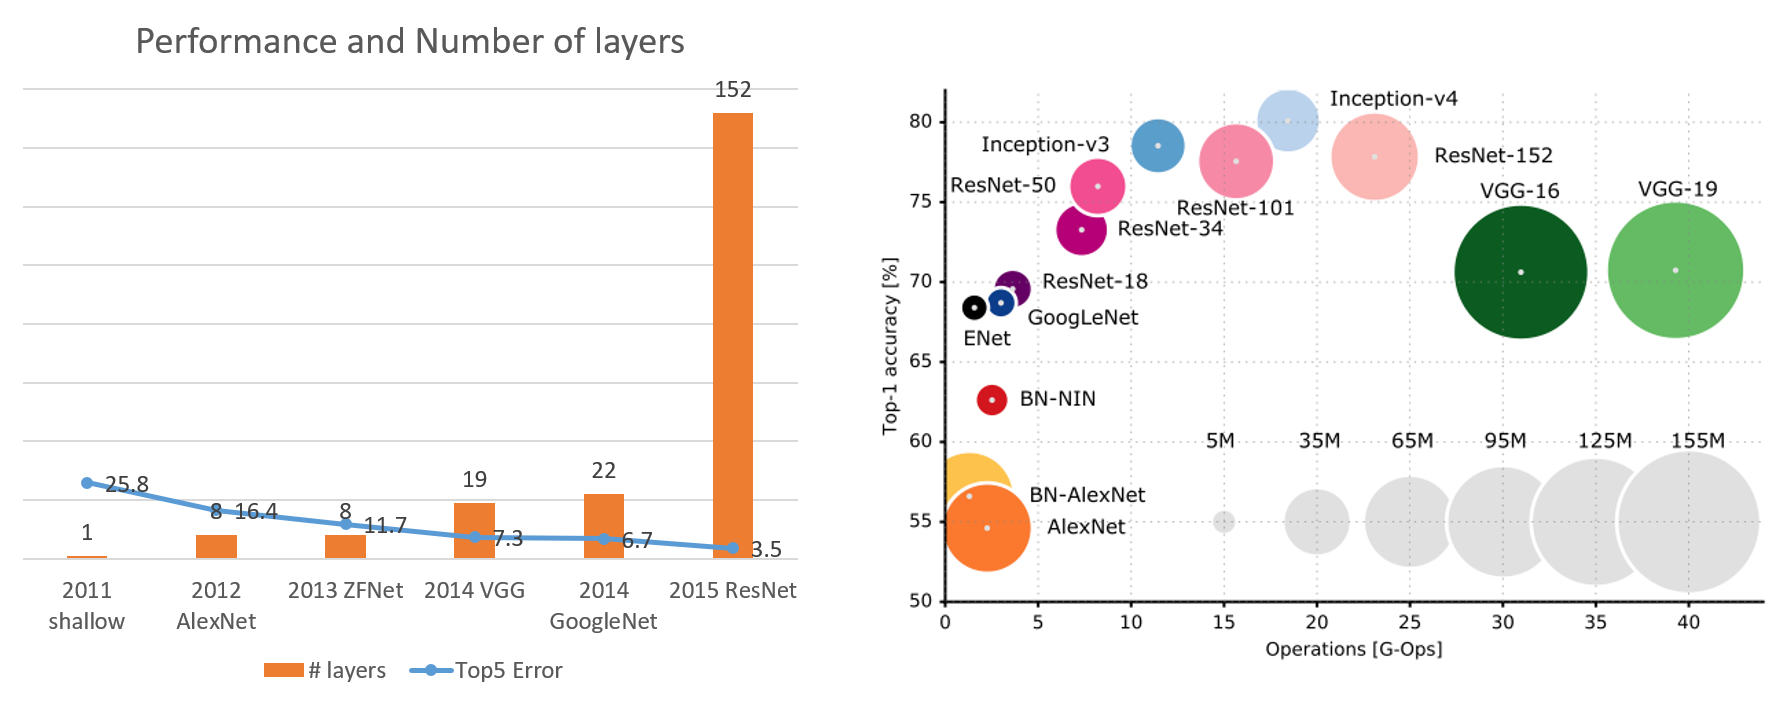


In [43]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3

resnet = ResNet50()
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 3, 224, 224)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 112, 112) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 112, 112) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 64, 112, 112) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

/root/miniconda3/envs/py36/lib/python3.6/site-packages/keras/applications/resnet50.py:274: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


## Fine-tune CNN for other classification tasks

**Dog VS Cat**


In [44]:
channel_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape((3,1,1))
def preprocess(x):
    """
        Subtracts the mean RGB value, and transposes RGB to BGR.
        The mean RGB was computed on the image set used to train the VGG model.

        Args: 
            x: Image array (channels x width)
        Returns:
            Image array (transposed_channels x height x width)
    """
    x = x - channel_mean
    return x[:, ::-1] # reverse axis rgb->bgr

def get_batches(dirname,  shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    path = ''
    return image.ImageDataGenerator(preprocessing_function=preprocess).flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

batches = get_batches('train', batch_size=8)
val_batches = get_batches('valid', batch_size=8)
imgs,labels = next(batches)
classes = {}
for c in batches.class_indices:
    classes[batches.class_indices[c]] = c
        
# This shows the 'ground truth'
plots(imgs, titles=labels)


NameError: name 'image' is not defined

In [ ]:
resnet = ResNet50()
resnet.pop()
for layer in model.layers: layer.trainable=False
resnet.add(Dense(2, activation='softmax'))
resnet.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=2,
                validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [ ]:
preds = resnet.predict(imgs)
idxs = np.argmax(preds, axis=1)    
for i in range(len(idxs)):
    idx = idxs[i]
    print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

# CNN for natural language processing


## Sentiment analysis of moive reviews

In [48]:
from keras.preprocessing import sequence
from keras.layers import Embedding, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# get_word_index

Loading data...
25000 train sequences
25000 test sequences


In [49]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [50]:
print('Build model...')
model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

Build model...


In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 12s 465us/step - loss: 0.4065 - acc: 0.7967 - val_loss: 0.2690 - val_acc: 0.8869
Epoch 2/2
25000/25000 [==============================] - 10s 409us/step - loss: 0.2232 - acc: 0.9112 - val_loss: 0.2659 - val_acc: 0.8900
